In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [85]:
df = pd.read_csv(r"Z:\Level 4\ML\segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# Data Exploration:

In [86]:
df.shape

(2000, 8)

In [87]:
df=df.drop('ID', axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [88]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [90]:
df.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [91]:
df.duplicated().sum()

0

# Data Visualization :

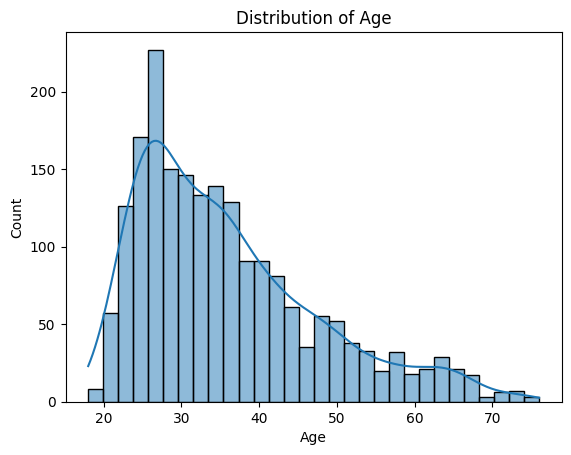

In [92]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

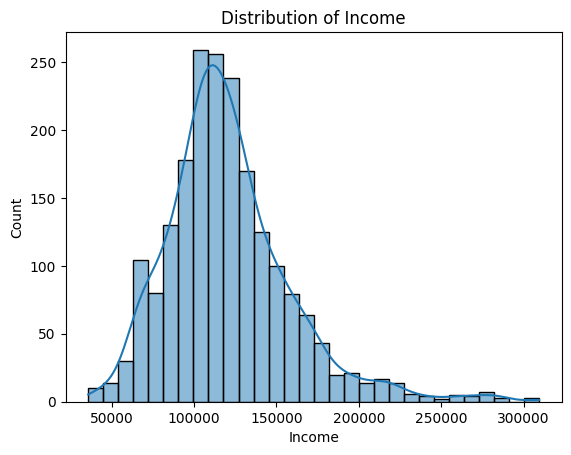

In [93]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.show()

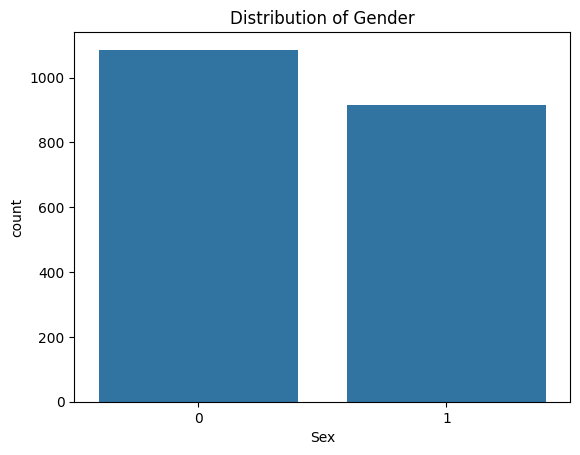

In [94]:
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Gender')
plt.show()

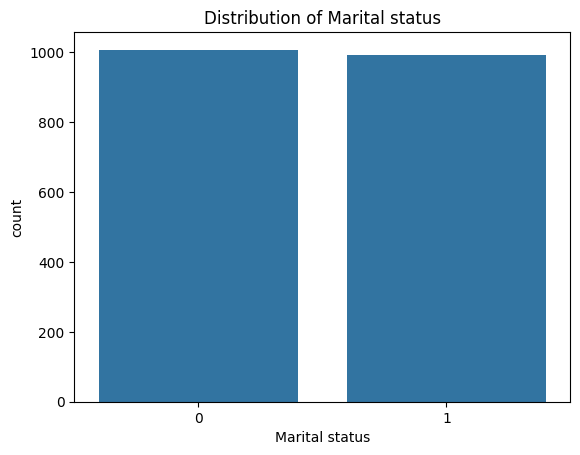

In [95]:
sns.countplot(x='Marital status', data=df)
plt.title('Distribution of Marital status')
plt.show()

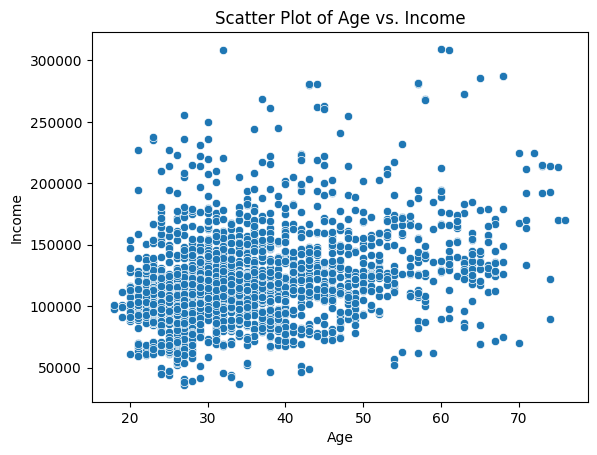

In [96]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Scatter Plot of Age vs. Income')
plt.show()


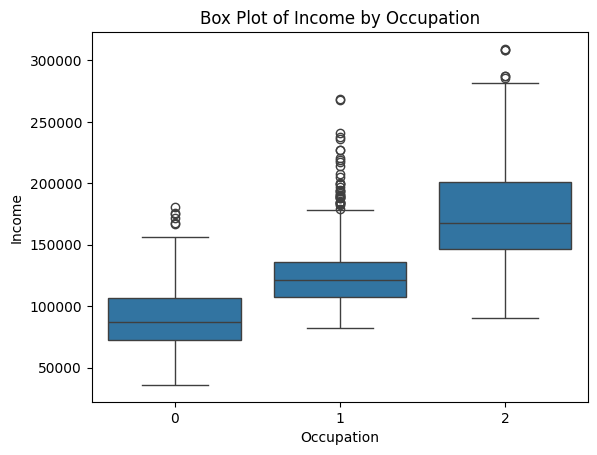

In [97]:
sns.boxplot(x='Occupation', y='Income', data=df)
plt.title('Box Plot of Income by Occupation')
plt.show()


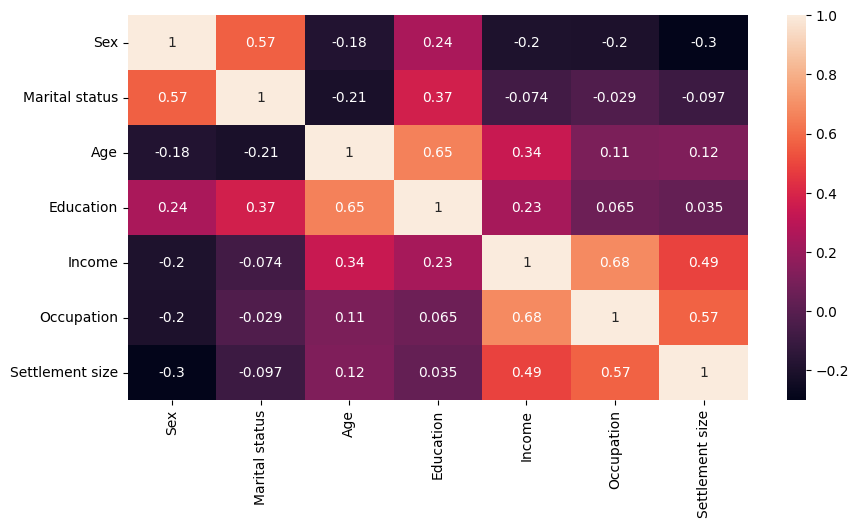

In [98]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

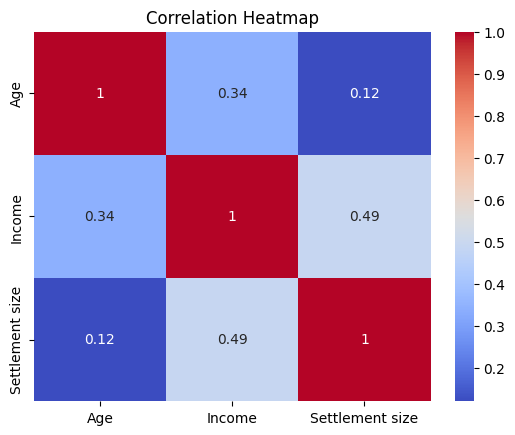

In [99]:
correlation_matrix = df[['Age', 'Income', 'Settlement size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


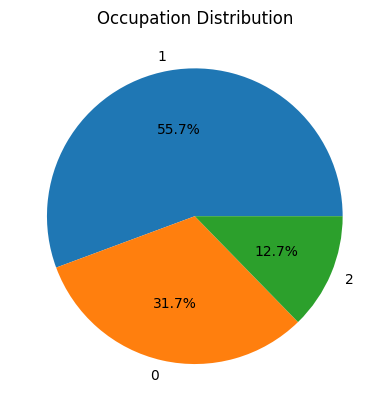

In [100]:
occupation_counts = df['Occupation'].value_counts()
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.title('Occupation Distribution')
plt.show()


# Kmeans Model:

In [102]:
X = df[['Age', 'Income']]  # Assuming you have columns 'Age' and 'Income'

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Income'])
    ])

# Define the KMeans model
kmeans = KMeans()

# Define the parameter grid
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [8, 10, 12]
}

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', GridSearchCV(kmeans, param_grid, cv=5))
])

# Fit the pipeline to the data
pipeline.fit(X)

# Get the best model from the pipeline
best_kmeans_model = pipeline.named_steps['kmeans'].best_estimator_

# Predict clusters using the best model
y_predict = best_kmeans_model.fit_predict(X)



Silhouette Score: 0.5406880311145233
Calinski-Harabasz Index: 6140.583970635593


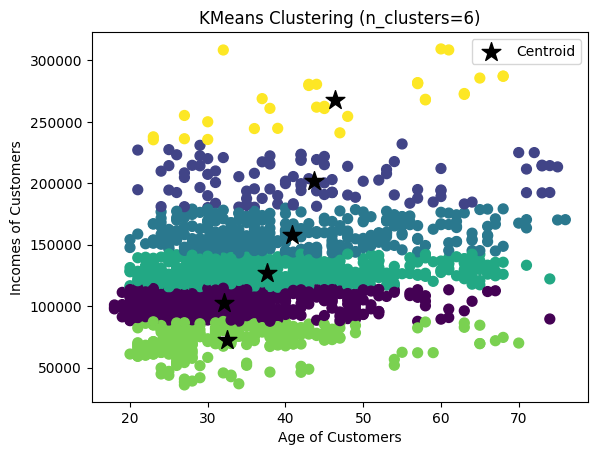

In [103]:
# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(X, y_predict)
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate the model using Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(X, y_predict)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")

# Visualize the clusters and centroids
plt.scatter(X['Age'], X['Income'], c=y_predict, cmap='viridis', s=50)
plt.scatter(best_kmeans_model.cluster_centers_[:, 0], best_kmeans_model.cluster_centers_[:, 1],
            s=200, c='black', label='Centroid', marker="*", edgecolors='black')
plt.title(f'KMeans Clustering (n_clusters={best_kmeans_model.n_clusters})')
plt.xlabel('Age of Customers')
plt.ylabel('Incomes of Customers')
plt.legend()
plt.show()